# Advanced Topics in Financial Modelling Project



---

Doris Allamani 

Meriem HAFID


---


The aim of this project is to analyze the performance and characteristics of three exchange-traded funds (ETFs) that track the S&P 500 index with different levels of leverage and direction. These ETFs are:

- SPDR S&P 500 ETF (SPY), which provides a delta-one exposure to the S&P 500 index.

- Direxion Daily S&P 500 Bull (SPXL) 3X Shares, which provides a three-to-one leveraged long exposure to the S&P 500 index.

- Direxion Daily S&P 500 Bear (SPXS) 3X Shares, which provides a three-to-one leveraged short exposure to the S&P 500 index.

## 1. Descriptive data analysis

---

### Package Imports & Home Directory
Below we import various modules/libraries to be used in our project.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

### Dataset


In [31]:
tickers = ['SPXS', 'SPY', 'SPXL']
data = pd.DataFrame()

for ticker in tickers:
    stock = yf.Ticker(ticker)
    data[ticker] = stock.history(start='2016-12-31', end='2023-01-01')['Close']
    
#data.index = data.index.strftime('%Y-%m-%d')
data.head()

,SPXS,SPY,SPXL
Date,,,
2017-01-03 00:00:00-05:00,510.920868,202.085281,25.688036
2017-01-04 00:00:00-05:00,502.687958,203.287552,26.143293
2017-01-05 00:00:00-05:00,503.172302,203.125961,26.082592
2017-01-06 00:00:00-05:00,497.845123,203.852753,26.376759
2017-01-09 00:00:00-05:00,502.203644,203.179840,26.126945


In [32]:
data.isna().sum()

SPXS    0
SPY     0
SPXL    0
dtype: int64

### The historical plot of prices

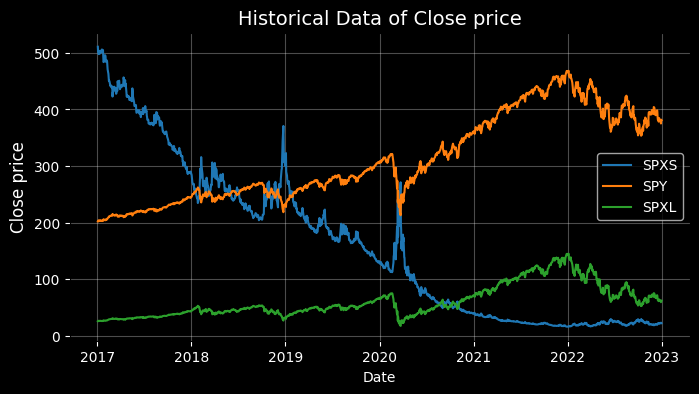

In [33]:
fig, ax = plt.subplots(figsize=(8,4))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.rcParams.update({'text.color': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white'})
for col in data.columns:
    ax.plot(data.index, data[col], label=col)

ax.set_xlabel('Date')
ax.set_ylabel('Close price', fontsize=12)
ax.set_title('Historical Data of Close price', fontsize=14)
ax.grid(color='white', alpha=0.3)
ax.legend(data.columns, fontsize=10, facecolor='black')
plt.show()

### Normalizing the data 

In [34]:
for i, ticker in enumerate(tickers) : 
  data[ticker] = data[ticker]/data.iloc[0,i]
data.head()

,SPXS,SPY,SPXL
Date,,,
2017-01-03 00:00:00-05:00,1.000000,1.000000,1.000000
2017-01-04 00:00:00-05:00,0.983886,1.005949,1.017723
2017-01-05 00:00:00-05:00,0.984834,1.005150,1.015360
2017-01-06 00:00:00-05:00,0.974407,1.008746,1.026811
2017-01-09 00:00:00-05:00,0.982938,1.005416,1.017086


### Descriptive statistics on the daily log-returns (annualized)
#### Log-returns
We calculate log returns as $r_t = log(\frac{P_t}{P_{t-1}})$ where $P$ is the price of an asset and $t$ is a time period.


In [35]:
data_log_returns = np.log(1 + data.pct_change()).dropna() #The first date 2017-01-03 does not have a value since it is our cut-off date.
data_log_returns.head()

,SPXS,SPY,SPXL
Date,,,
2017-01-04 00:00:00-05:00,-0.016245,0.005932,0.017567
2017-01-05 00:00:00-05:00,0.000963,-0.000795,-0.002325
2017-01-06 00:00:00-05:00,-0.010644,0.003572,0.011215
2017-01-09 00:00:00-05:00,0.008717,-0.003306,-0.009516
2017-01-10 00:00:00-05:00,0.002889,0.000000,-0.000894


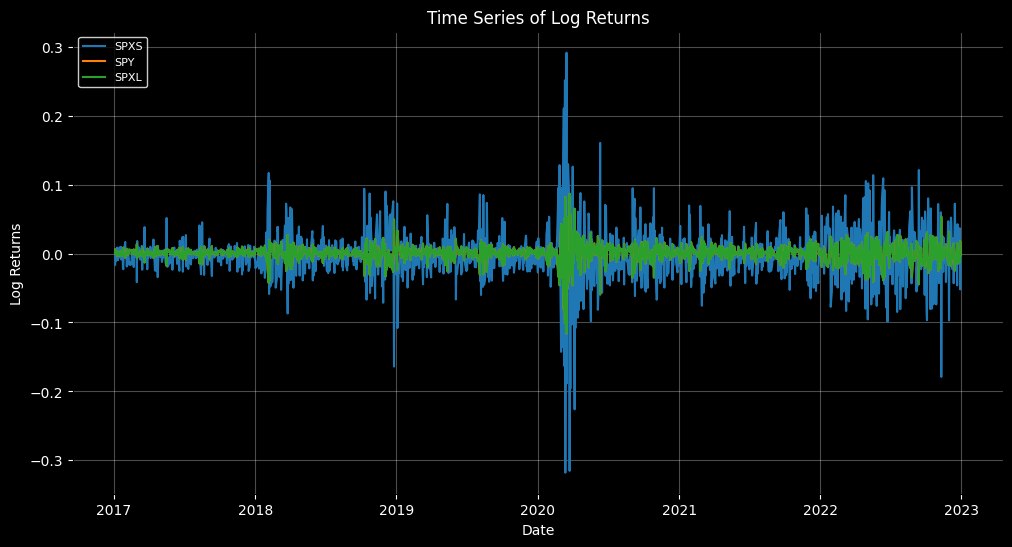

In [36]:
ticker1_returns = data_log_returns['SPXS']
ticker2_returns = data_log_returns['SPY']
ticker3_returns = data_log_returns['SPXL']

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(ticker1_returns.index, ticker1_returns, color='tab:blue', label='SPXS')
ax.plot(ticker2_returns.index, ticker2_returns, color='tab:orange', label='SPY')
ax.plot(ticker3_returns.index, ticker2_returns, color='tab:green', label='SPXL')
ax.set_xlabel('Date')
ax.set_ylabel('Log Returns')
ax.set_title('Time Series of Log Returns')
ax.legend(loc='upper left', facecolor='black', edgecolor='white', prop={'size': 8})
ax.grid(color='white', alpha=0.3)
plt.rcParams.update({'text.color': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white'})
plt.ion()
plt.show()

Interpretation:  

- The graph shows the log returns of three ETFs: SPXS, SPY and SPXL, from January 2017 to December 2022. We observe that the log returns were more volatile in 2020, when the index experienced a sharp crash due to the pandemic and its economic impact. The log returns were more stable in the second half of 2020 and 2021, when the index reached new highs. The log returns were more volatile again in 2022, when the index faced some corrections due to inflation fears and geopolitical tensions.

#### The statistics: 

- Mean: $\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i$

- Volatility: $\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$

- Sharpe ratio: $S = \frac{\bar{x} - r_f}{\sigma}$ where $r_f$ is the risk-free rate.

- Skewness: $\gamma_1 = \frac{E[(X - \mu)^3]}{\sigma3}$

- Kurtosis: $\gamma_2 = \frac{E[(X - \mu)^4]}{\sigma4}$

In [37]:
stats = {}
for ticker in data_log_returns.columns:
  mean = data_log_returns[ticker].mean() * 252
  volatility = data_log_returns[ticker].std() * np.sqrt(252)
  sharpe_ratio = mean/volatility
  skewness = data_log_returns[ticker].skew()
  kurtosis = data_log_returns[ticker].kurtosis()
  stats[ticker] = {
        'Mean': mean,
        'Volatility': volatility,
        'Sharpe ratio': sharpe_ratio,
        'Skewness': skewness,
        'Kurtosis': kurtosis}

table = pd.DataFrame.from_dict(stats, orient='index')
table

,Mean,Volatility,Sharpe ratio,Skewness,Kurtosis
SPXS,-0.524916,0.597610,-0.878359,-0.302618,13.481224
SPY,0.105885,0.199499,0.530753,-0.848019,13.453433
SPXL,0.146773,0.608066,0.241377,-1.509409,18.431971


Interpretation: 

- SPXS: This ETF has a negative Sharpe ratio, which means that it has a negative excess return per unit of risk. This is because it is an inverse leveraged fund that moves in the opposite direction of the S&P 500 index, and amplifies its movements by three times. This makes it very volatile (0.597610) and prone to large losses when the index goes up. Moreover, the positive skewness (-0.302618) suggests that it may have more chances of losing big and gaining small than the opposite, while the high kurtosis (13.481227) implies that its returns may deviate from the average.

- SPY: This ETF has a positive Sharpe ratio, which means that it has a positive excess return per unit of risk. This is because it is a passive fund that tracks the performance of the S&P 500 index. This makes it less volatile and more stable than SPXS or SPXL. It also has a negative skewness and a high kurtosis, which indicate that its returns are asymmetric and deviate from the normal distribution. 

- SPXL: This ETF has a positive Sharpe ratio, but lower than SPY. This means that it has a positive excess return per unit of risk, but not as high as SPY. This is because it is a leveraged fund that moves in the same direction of the S&P 500 index, and amplifies its movements by three times. This makes it very volatile and prone to large gains or losses when the index moves. It also has a negative skewness (-1.509410) and a high kurtosis, which indicate that it may have more frequent and extreme outliers than SPY or SPXS, but in the same direction of SPY.



#### Yearly Volatility and Sharpe ratio 

In [38]:
TRADING_DAYS = 252
Volatility = data_log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

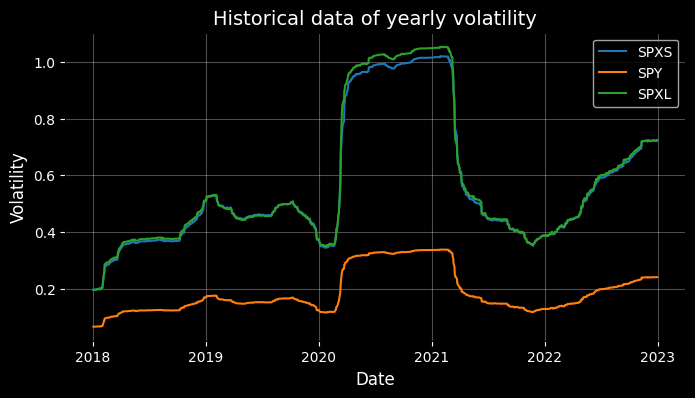

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

for col in data.columns:
    ax.plot(Volatility.index, Volatility[col])

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Volatility', fontsize=12)
ax.set_title('Historical data of yearly volatility', fontsize=14)
ax.legend(Volatility.columns, fontsize=10, facecolor='black')
ax.grid(color='white', alpha=0.3)
plt.rcParams.update({'text.color': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white'})
plt.show()

Interpretation: 
- Betwenn 2018 to 2020, the yearly volatility of SPY is stable, but we observe that a jup in volatility of SPY creates a larger jump in the volatility of ETFs.

- We observe that during the 2020 crisis the volatility of ETFs spiked from around 0.4 to above 1. Meanwhile the volatility of SPY which is delta one exposure for S&P 500 had little changes compared to the ETFs by only 0.2. Therefore, the price of the ETFs has fluctuated rapidly during 2020. 

- Moreover, we note that in 20222 the volatility of SPY has slightly increased comapred to the effect that has on ETFs with a sharper increase. This might be due the post pandemic economic crisis and geopolitical tensions.

In [40]:
sharpe_ratio = data_log_returns.mean()*TRADING_DAYS/Volatility

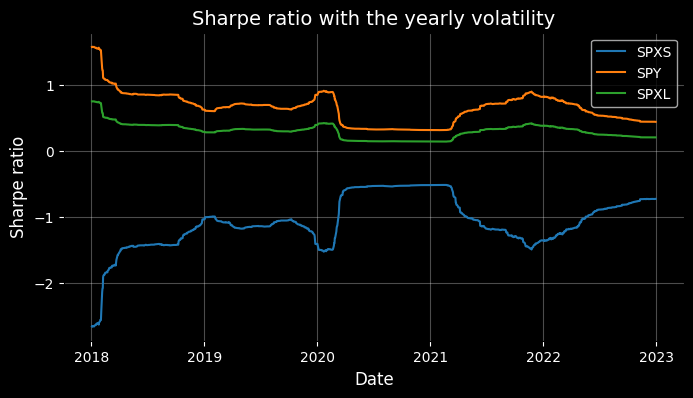

In [41]:
fig, ax = plt.subplots(figsize=(8,4))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.plot(sharpe_ratio.index, sharpe_ratio)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sharpe ratio', fontsize=12)
ax.set_title('Sharpe ratio with the yearly volatility', fontsize=14)
ax.legend(Volatility.columns, fontsize=10, facecolor='black')
ax.grid(color='white', alpha=0.3)
plt.rcParams.update({'text.color': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white'})
plt.show()

Interpretation:
- We observe that the Sharpe Ratio of SPXL is lower compared to the SPY with delta one exposure for S&P 500. The inverse ETF,  SPXS, has negative Sharpe Ratio and has an opposite trend of SPY.


In [42]:
stats = {}
data_log_returns.index = pd.to_datetime(data_log_returns.index)
for year in data_log_returns.index.year.unique():
    year_data = data_log_returns[data_log_returns.index.year == year]
    
    for ticker in year_data.columns:
        mean = year_data[ticker].mean() * 252
        volatility = year_data[ticker].std() * np.sqrt(252)
        sharpe_ratio = mean/volatility
        skewness = year_data[ticker].skew()
        kurtosis = year_data[ticker].kurtosis()
        if ticker not in stats:
          stats[ticker] = pd.DataFrame(columns=['Mean', 'Volatility', 'Sharpe ratio', 'Skewness', 'Kurtosis'])
        stats[ticker].loc[year] = [mean, volatility, sharpe_ratio, skewness, kurtosis]

table = pd.concat(stats, axis=1)
table.columns.names = ['Ticker', 'Statistics']
format_dict = {
    'Mean': '{:.2%}',
    'Volatility': '{:.2%}',
    'Sharpe ratio': '{:.2f}',
    'Skewness': '{:.2f}',
    'Kurtosis': '{:.2f}'
}
styled_table = table.style.format(format_dict)
styled_table.set_caption('Yearly Statistics for Each ETF')
styled_table

Interpretation and comparaison of the performance of the 3 ETFs from 2017 to 2022:

 - SPXS had a negative mean return in every year except 2018 and 2022, which means it lost money in most years. It also had a negative Sharpe ratio in every year except 2018, which means it had a poor risk-adjusted return. It also had the highest volatility in every year, which means it had the largest fluctuations in its price. It was negatively correlated with the S&P 500 index, as it moved in the opposite direction. It was suitable for investors who wanted to bet against the market or hedge their long positions. Its skewness and kurtosis varied across the years, but they were generally higher than those of SPY and SPXL.

 - SPY had a positive mean return in every year except 2018 and 2022, which means it gained money in most years. It also had a positive Sharpe ratio in every year except 2018 and 2022, which means it had a good risk-adjusted return. It also had the lowest volatility in every year, which means it had the smallest fluctuations in its price. It was positively correlated with the S&P 500 index, as it moved in the same direction. It was suitable for investors who wanted to track the market or diversify their portfolio. Its skewness and kurtosis varied across the years, but they were generally lower than those of SPXS and SPXL.

 - SPXL had a positive mean return in every year except 2018 and 2022, which means it gained money in most years. It also had a positive Sharpe ratio in every year except 2018 and 2022, which means it had a good risk-adjusted return. However, it also had a similar volatility to SPXS in every year, which means it was very risky. It was positively correlated with the S&P 500 index, as it moved in the same direction. However, it amplified the movements by three times, which means it could have higher gains or losses. It was suitable for investors who wanted to leverage their exposure to the market or speculate on short-term trends. Its skewness and kurtosis varied across the years, but they were generally higher than those of SPY and lower than those of SPXS.


In [43]:
corr_matrix = data_log_returns.corr(method='pearson')
corr_matrix

,SPXS,SPY,SPXL
SPXS,1.000000,-0.994145,-0.987890
SPY,-0.994145,1.000000,0.997946
SPXL,-0.987890,0.997946,1.000000


Interpretation: 
- As expected the SPXS has a very high negative correlation with SPY and SPXL, which means that their returns move in opposite directions most of the time. This is because SPXS is an inverse leveraged fund that bets against the S&P 500 index, while SPY and SPXL are funds that bet on the index. Therefore, when the index goes up, SPXS goes down, and vice versa.

- We can also see that SPY and SPXL have a very high positive correlation, which means that their returns move in the same direction most of the time. This is because both SPY and SPXL are funds that track the performance of the S&P 500 index, although SPXL does so with a 3x leverage.

### More explanatory analysis: (curiosity)
Having a look over 2020 on the covid period and the lockdown impact





In [44]:
data_log_returns['comparison SPY and SPXL'] = abs(data_log_returns['SPXL'] - 3 *data_log_returns['SPY'])
data_log_returns['comparison SPY and SPXS'] = abs(data_log_returns['SPXS'] + 3 * data_log_returns['SPY'])

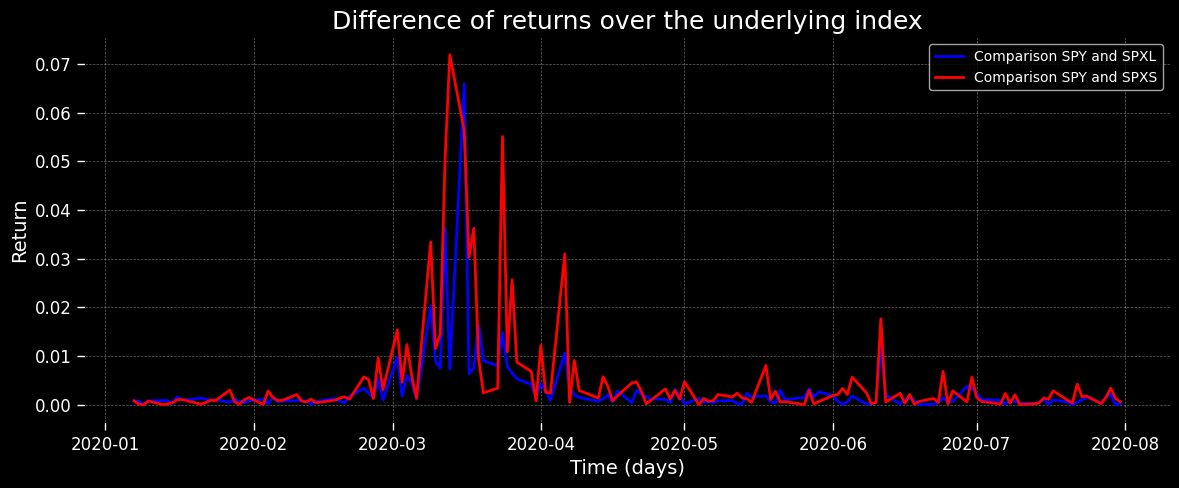

In [45]:
fig, ax = plt.subplots(figsize=(14,5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.plot(data_log_returns.iloc[756:900,:].index, data_log_returns.iloc[756:900,-2], color='blue', linewidth=2, label='Comparison SPY and SPXL')
ax.plot(data_log_returns.iloc[756:900,:].index, data_log_returns.iloc[756:900,-1], color='red', linewidth=2, label='Comparison SPY and SPXS')
ax.set_xlabel('Time (days)', fontsize=14, color='white')
ax.set_ylabel('Return', fontsize=14, color='white')
ax.set_title('Difference of returns over the underlying index', fontsize=18, color='white')
ax.legend(fontsize=10, loc='upper right', facecolor='black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

Interpretation: 

- The graph above represents the absolute difference of ETFs in respect with the 3 times return of S&P 500 index. We observe that during the 2020 pandemic crisis where the S&P 500 volatility spiked from around 0.4 to 1, there is a difference of return of almost 0.07%. 

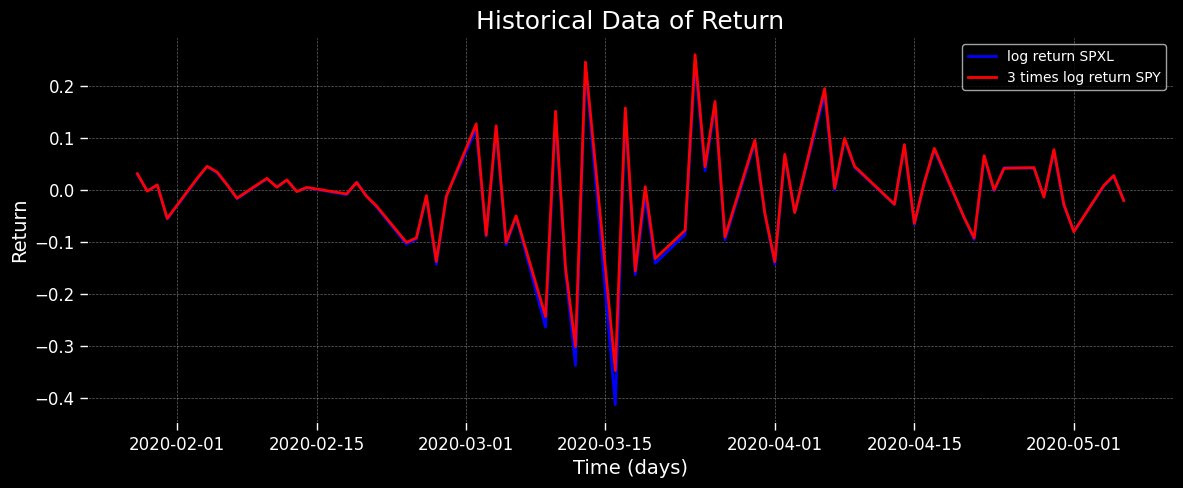

In [46]:
fig, ax = plt.subplots(figsize=(14,5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

#ax.plot(data_log_returns.iloc[1:5,:].index, data_log_returns.iloc[1:5,-1], label = 'comparison SPY and SPXL' )
ax.plot(data_log_returns.iloc[770:840,:].index, data_log_returns.iloc[770:840,2], color='blue', linewidth=2, label = 'log return SPXL' )
ax.plot(data_log_returns.iloc[770:840,:].index, 3* data_log_returns.iloc[770:840,1], color='red', linewidth=2, label = '3 times log return SPY' )

ax.set_xlabel('Time (days)', fontsize=14, color='white')
ax.set_ylabel('Return', fontsize=14, color='white')
ax.set_title('Historical Data of Return', fontsize=18, color='white')
ax.legend(fontsize=10, loc='upper right', facecolor='black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

Interpretation: 

- During 2020 Covid crisis, we observe that the returns of SPXL were not exactly matching the returns of the S&P 500, resulting in lower returns than those promised. 

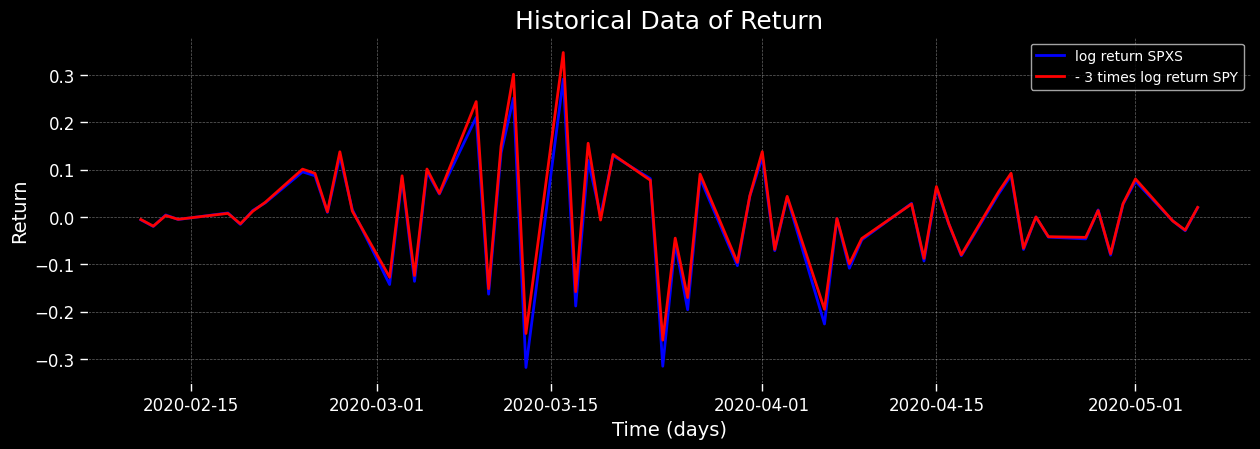

In [47]:
fig, ax = plt.subplots(figsize=(15,4.5))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

#ax.plot(data_log_returns.iloc[1:5,:].index, data_log_returns.iloc[1:5,-1], label = 'comparison SPY and SPXL' )
ax.plot(data_log_returns.iloc[780:840,:].index, data_log_returns.iloc[780:840,0], color='blue', linewidth=2, label = 'log return SPXS')
ax.plot(data_log_returns.iloc[780:840,:].index, -3* data_log_returns.iloc[780:840,1], color='red', linewidth=2, label = '- 3 times log return SPY' )

ax.set_xlabel('Time (days)', fontsize=14, color='white')
ax.set_ylabel('Return', fontsize=14, color='white')
ax.set_title('Historical Data of Return', fontsize=18, color='white')
ax.legend(fontsize=10, loc='upper right', facecolor='black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

Interpretation: 
- During 2020 Covid crisis, we observe that the returns of SPXS were not exactly matching the returns of the S&P500, resulting in lower returns than those promised.

##2. Power profiles and Gamma efects
----

### For both SPXL and SPXS, $\frac{V_{T}}{V_{0}}$  graphs as a function of $\frac{SPY_{T}}{SPY_{0}}$ for rolling one year returns

Formulas:

 - **Strategy value of SPXL**: $\frac{V_{T}}{V_{0}} =  (\frac{SPY_{T}}{SPY_{0}})^3$

 - **Strategy value of SPXS**: $\frac{V_{T}}{V_{0}} =  (\frac{SPY_{T}}{SPY_{0}})^{-3}$.

In [48]:
values = data/data.rolling(window=252).apply(lambda x: x[0])
values = values.dropna()

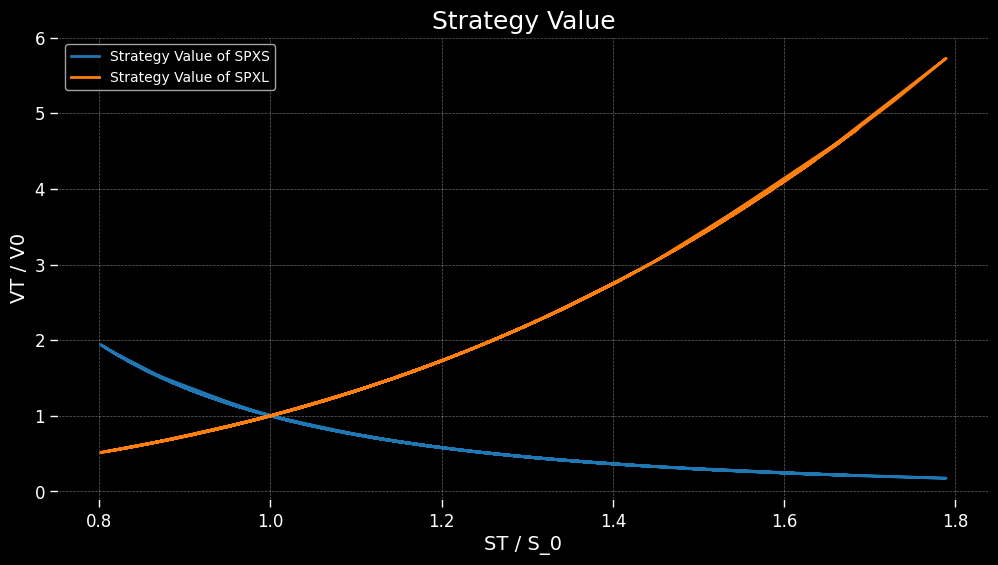

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

line1, = ax.plot(values['SPY'],values['SPY'] **(-3), linewidth=2, label='Strategy Value of SPXS')
line2, = ax.plot(values['SPY'],values['SPY'] **(3), linewidth=2, label='Strategy Value of SPXL')
ax.set_xlabel('ST / S_0', fontsize=14, color='white')
ax.set_ylabel('VT / V0', fontsize=14, color='white')
ax.set_title('Strategy Value', fontsize=18, color='white')
ax.legend(handles=[line1, line2], fontsize=10, loc='upper left', facecolor='black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

Intrepretation:

- We observe that both strategys payoff are convex.

- The interpretation of the convexity of these two ETFs is that they have a non-linear relationship with the underlying index, which is the S&P 500. This means that their returns are not proportional to the returns of the index, but rather depend on the magnitude and direction of the market movements.


### Graphs of strategies values taking into account the trading impact

Formulas:

 - **Strategy value of SPXL**: $\frac{V_{T}}{V_{0}} =  (\frac{SPY_{T}}{SPY_{0}})^{3} \exp(-\frac{6}{2} ∫_{0}^{T}\sigma_{s}^{2}ds)$

 - **Strategy value of SPXS**: $\frac{V_{T}}{V_{0}} =  (\frac{SPY_{T}}{SPY_{0}})^{-3}\exp(-\frac{12}{2} ∫_{0}^{T}\sigma_{s}^{2}ds)$.

 where $\sigma_{s}^{2}$ is the variance of the SPY.

In [50]:
variances = data_log_returns[['SPY']].rolling(window=252).var()*(TRADING_DAYS)
variances = variances.dropna()

In [51]:
values_cost_SPXS = (values['SPY']**(-3))*np.exp(-0.5 * 12 * variances['SPY'])

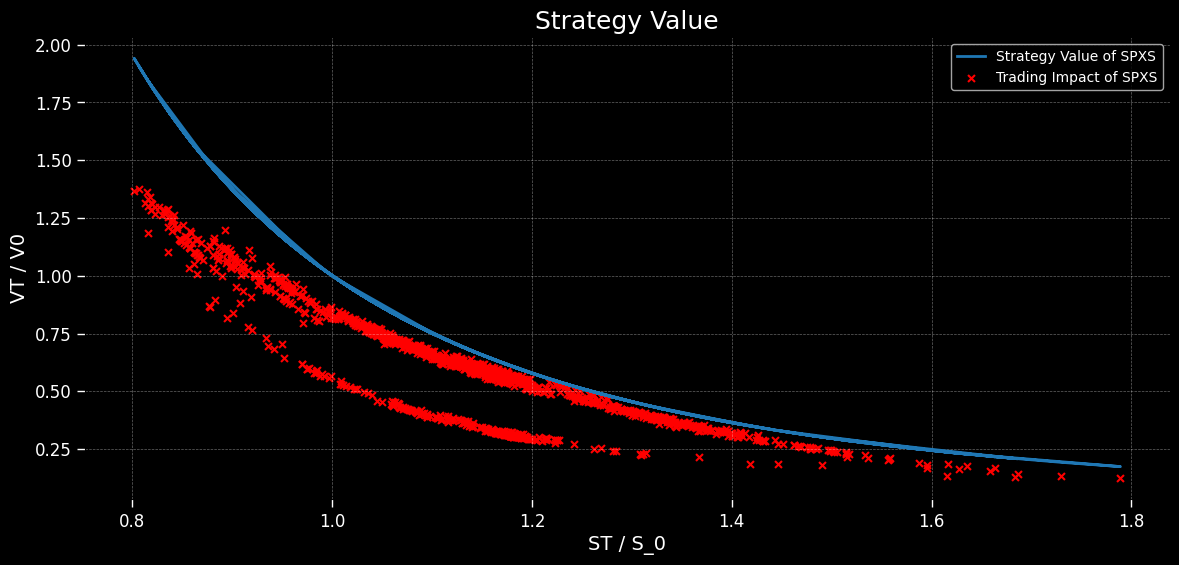

In [52]:
fig, ax = plt.subplots(figsize=(14,6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

line, = plt.plot(values['SPY'], values['SPY'] **(-3), color='#1f77b4', linewidth=2, label='Strategy Value of SPXS')
scatter = plt.scatter(values['SPY'], values_cost_SPXS, marker='x', color='red', s=25, label='Trading Impact of SPXS')

ax.set_xlabel('ST / S_0', fontsize=14, color='white')
ax.set_ylabel('VT / V0', fontsize=14, color='white')
ax.set_title('Strategy Value', fontsize=18, color='white')
ax.legend(handles=[line, scatter], fontsize=10, loc='upper right', facecolor='black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

In [53]:
#the sum of squared residuals
((values_cost_SPXS - np.array(values['SPY']) **(-3))**2).sum()

59.132888554678

- Looking at the graph above, we observe that the gamma effect on the constant mix strategy has an impact by the realized rolling one year volatility and the exposure. Notice that, when the annual ratio of stock price is 1, the returns of our strategy when market is bear is below 1, reaching to 0.5. Hence, in some year invested in this ETF, from the historical data we have looses which range 20% to 50% of the initial investment. 


- The sum of squared residuls for this strategy is 59.13, indicating that the fit is good.

In [54]:
values_cost_SPXL = (values['SPY']**3)*np.exp(-0.5 * 6 * variances['SPY'])

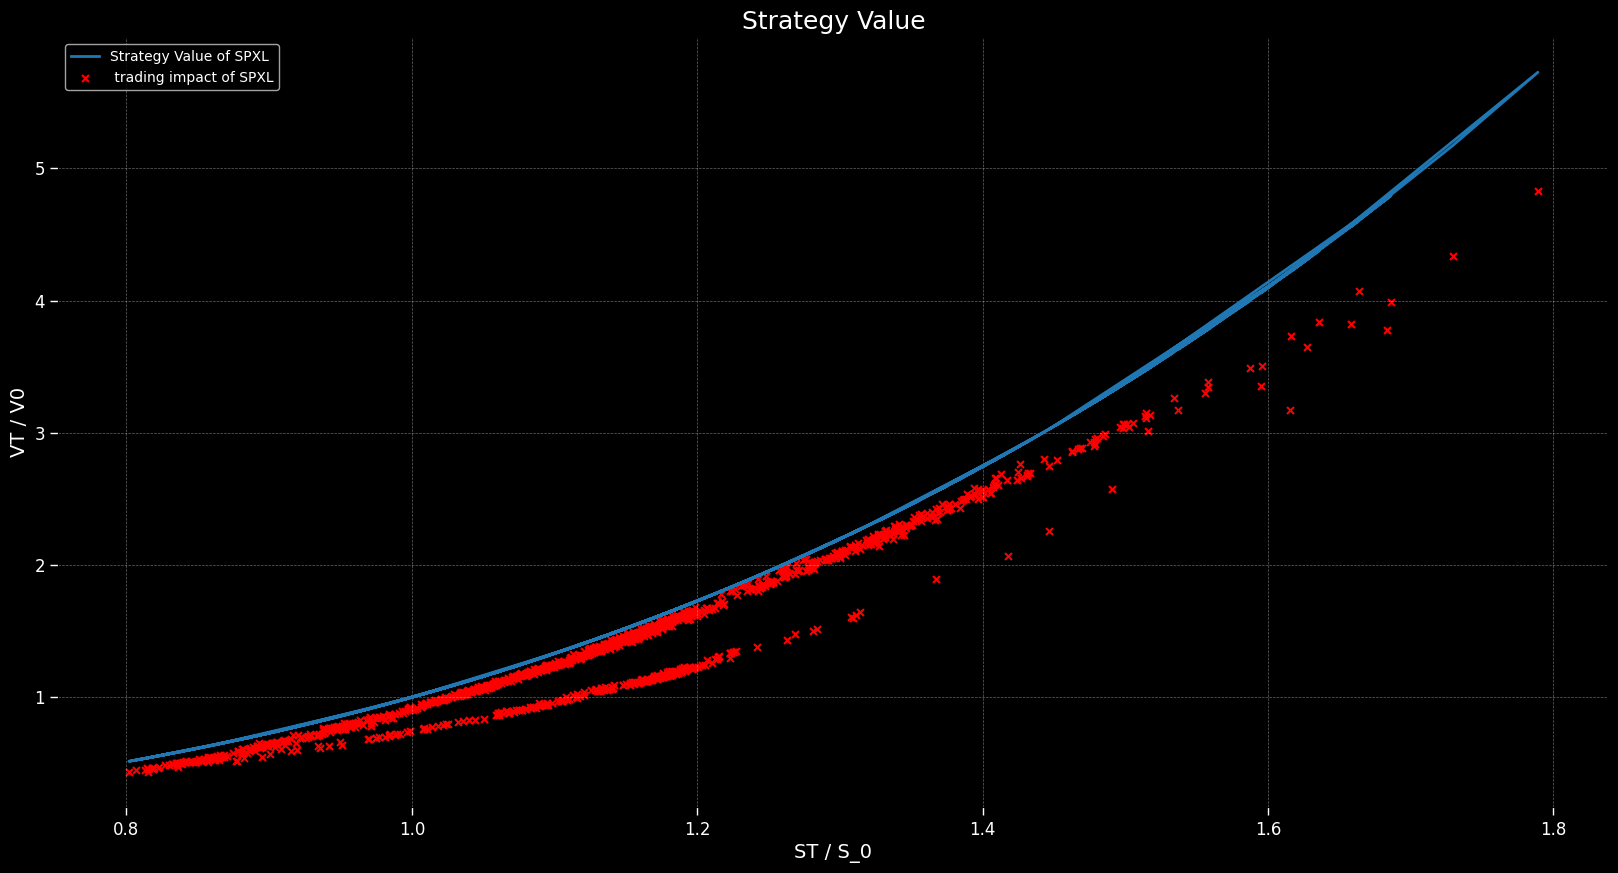

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

line, = plt.plot(values['SPY'],values['SPY'] **3, color='#1f77b4', linewidth=2, label='Strategy Value of SPXL')
scatter = plt.scatter(values['SPY'],values_cost_SPXL , marker='x', color='r', s=25, label=' trading impact of SPXL')

ax.set_xlabel('ST / S_0', fontsize=14, color='white')
ax.set_ylabel('VT / V0', fontsize=14, color='white')
ax.set_title('Strategy Value', fontsize=18, color='white')
ax.legend(handles=[line,scatter], fontsize=10, loc='upper left',facecolor = 'black')
ax.tick_params(axis='x', colors='white', labelsize=12, length=6, width=1)
ax.tick_params(axis='y', colors='white', labelsize=12, length=6, width=1)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.4)
plt.show()

In [56]:
#the sum of squared residuals
((values_cost_SPXL - np.array(values['SPY']) **(3))**2).sum()

63.8696922613677

- Given the case when the market is bull, the SPXL ETF hasn't performed in the our expectation. Notice that, when the one year rolling change is one, the gamma cost has a huge effect resulting that in some years that the value of the strategy is around 0. 

- The trading cost reduces the convexity and the expected return of the SPXL strategy, and makes it more sensitive to market volatility. The discount factor for the SPXS strategy is $\exp(-\frac{12}{2} ∫_{0}^{T}\sigma_{s}^{2}ds)$, which is smaller than the discount factor for the SPXL strategy, $\exp(-\frac{6}{2} ∫_{0}^{T}\sigma_{s}^{2}ds)$. This means that the SPXL strategy has higher trading costs than the SPXS strategy, and it suffers more from market fluctuations.

- For qualifying the goodness of fit for this strategy we have calculate the sum of squared residuals which is 63.88. In this case the goodness of fit is worse than the counterparty ETF when the market is bear. 

##3. The product provider FAQ

---

1. Do they reflect appropriately the nature of the product for the layman
investor ?

  On the website it is mentioned that Direxion Daily ETFs seek daily investment results and the website emphafises that it is not appropriate for buy and hold investing. Indeed, we have seen from the graphs above that one year rolling investment results in loses and no profits. 

  Overall information about this ETFs is correct.

- Would you suggest any modication ?

  From the website we quote "It is important to understand that an investor in Direxion ETFs cannot lose an amount greater than their initial investment". 

  Given from our analysis, it is not true, this constant mix strategy results in losses in cases where the investment is one year long and the stock price returns back to the origin price than we reult in losses.  

2. How can the Bull and Bear Fund that track the same benchmark index both have a negative return for the same given period?

  The suggested explanation:

  According to our statistic, the SPY had an annualized volatility around 19% over the past five years, while SPXL had an annualized volatility of 59% and SPXS had an annualized volatility of 60%. This means that the returns of SPXL and SPXS fluctuated much more than the returns of the index over the past five years, which increased their risk and uncertainty.
  
  Therefore, due to the effects of compounding and volatility, leveraged and inverse ETFs suffered much larger losses than the index over the past five years, which eroded their value and performance.

##4. Clients advise
---

1. What should be told to clients to better manage their expectations ?

- We shall epmhasize that the these ETFs are designed to provide daily leveraged or inverse exposure to the S&P 500, which means that they are not intended for buy-and-hold or long-term long term investment. But still have some advantage of short-term market trends and opportunities.

- The performance of these ETFs can vary significantly due to various factors. Therefore, we should keep a close eye on and adjust the positions as needed to get the exposure we want.

- They can also experience significant losses over longer periods of time, even if the index remains flat or moves slightly in their favor.

- The high volatility, high trading costs and high market risk of these ETFs can lead to a large price movements in either direction in a short period of time. These ETFs can also lose value quickly and substantially when the market moves against to target as a result the client need to have a high risk tolerance.

      
2. Should the team keep them on the advisory list ?

- We don't really suggest these ETFs as they are a real headache.Therefore, they could be best used for intraday trading.